# TSAI Assignment 5

In [1]:
from utils import torch,nn,F,optim,datasets,transforms
import utils
import model

Create Train and test Transforms - use utils module

In [2]:
# Data transformation parameters
centerCrop = 22
resize = 28
randomRotate = 15.
mean = 0.1307
std_dev = 0.3081

#Get train data transformation
train_transforms = utils.getTrainTransforms(centerCrop, resize, randomRotate,mean,std_dev)

#Get Test data transformations
test_transforms = utils.getTestTransforms(mean,std_dev)

Get the MNIST data - train dataset and test dataset

In [4]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

Get the train_loader and test_loader -  batches of data used in model training/testing

In [6]:
batch_size = 512

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

train_loader = torch.utils.data.DataLoader(train_data, **kwargs)
test_loader = torch.utils.data.DataLoader(test_data, **kwargs)

In [19]:
type(train_acc)


list

Plot some train data to make sure the loading is correct

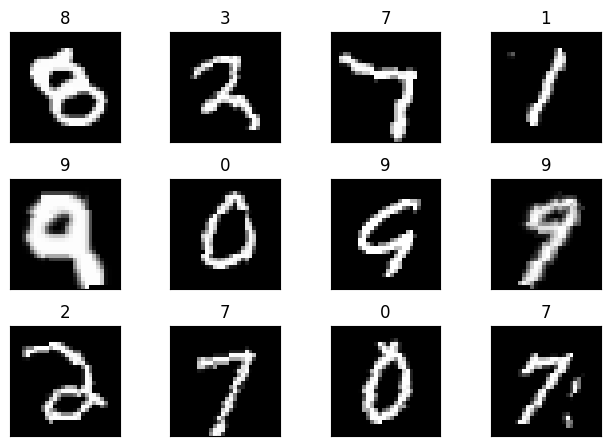

In [7]:
utils.plotData(train_loader, 12, 'gray')

Creating the first model, from the module - model

In [8]:
myFirstModel = model.getModel()

Print the model summary to know your model

In [9]:
utils.printModelSummary(myFirstModel,(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             320
            Conv2d-2           [-1, 64, 24, 24]          18,496
            Conv2d-3          [-1, 128, 10, 10]          73,856
            Conv2d-4            [-1, 256, 8, 8]         295,168
            Linear-5                   [-1, 50]         204,850
            Linear-6                   [-1, 10]             510
Total params: 593,200
Trainable params: 593,200
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.67
Params size (MB): 2.26
Estimated Total Size (MB): 2.94
----------------------------------------------------------------


In [10]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

Train and test your model for mutiple epochs

In [13]:
optimizer = optim.SGD(myFirstModel.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
criterion = F.nll_loss
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  tr_Acc, tr_loss = utils.train(myFirstModel, train_loader, optimizer, criterion)
  tst_acc, tst_loss = utils.test(myFirstModel, test_loader, criterion)
  train_acc.append(tr_Acc)
  train_losses.append(tr_loss)
  test_acc.append(tst_acc)
  test_losses.append(tst_loss)
  scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=1.8184 Batch_id=117 Accuracy=26.71: 100%|████████████████████████████████| 118/118 [00:19<00:00,  6.02it/s]


Test set: Average loss: 1.7668, Accuracy: 3573/10000 (35.73%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=0.1122 Batch_id=117 Accuracy=81.82: 100%|████████████████████████████████| 118/118 [00:12<00:00,  9.14it/s]


Test set: Average loss: 0.1350, Accuracy: 9605/10000 (96.05%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=0.1139 Batch_id=117 Accuracy=94.72: 100%|████████████████████████████████| 118/118 [00:12<00:00,  9.32it/s]


Test set: Average loss: 0.0896, Accuracy: 9728/10000 (97.28%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.0834 Batch_id=117 Accuracy=96.13: 100%|████████████████████████████████| 118/118 [00:12<00:00,  9.33it/s]


Test set: Average loss: 0.0620, Accuracy: 9799/10000 (97.99%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.0487 Batch_id=117 Accuracy=96.93: 100%|████████████████████████████████| 118/118 [00:13<00:00,  9.00it/s]


Test set: Average loss: 0.0523, Accuracy: 9835/10000 (98.35%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=0.0334 Batch_id=117 Accuracy=97.45: 100%|████████████████████████████████| 118/118 [00:13<00:00,  8.88it/s]


Test set: Average loss: 0.0457, Accuracy: 9859/10000 (98.59%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=0.1153 Batch_id=117 Accuracy=97.61: 100%|████████████████████████████████| 118/118 [00:13<00:00,  8.51it/s]


Test set: Average loss: 0.0464, Accuracy: 9854/10000 (98.54%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=0.0735 Batch_id=117 Accuracy=97.83: 100%|████████████████████████████████| 118/118 [00:13<00:00,  8.70it/s]


Test set: Average loss: 0.0380, Accuracy: 9880/10000 (98.80%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=0.0741 Batch_id=117 Accuracy=98.12: 100%|████████████████████████████████| 118/118 [00:13<00:00,  9.00it/s]


Test set: Average loss: 0.0387, Accuracy: 9870/10000 (98.70%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 10


Train: Loss=0.0540 Batch_id=117 Accuracy=98.20: 100%|████████████████████████████████| 118/118 [00:14<00:00,  8.39it/s]


Test set: Average loss: 0.0388, Accuracy: 9877/10000 (98.77%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 11


Train: Loss=0.0196 Batch_id=117 Accuracy=98.34: 100%|████████████████████████████████| 118/118 [00:13<00:00,  8.72it/s]


Test set: Average loss: 0.0446, Accuracy: 9858/10000 (98.58%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 12


Train: Loss=0.0096 Batch_id=117 Accuracy=98.43: 100%|████████████████████████████████| 118/118 [00:13<00:00,  8.75it/s]


Test set: Average loss: 0.0289, Accuracy: 9901/10000 (99.01%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 13


Train: Loss=0.0632 Batch_id=117 Accuracy=98.55: 100%|████████████████████████████████| 118/118 [00:13<00:00,  8.65it/s]


Test set: Average loss: 0.0261, Accuracy: 9916/10000 (99.16%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 14


Train: Loss=0.0085 Batch_id=117 Accuracy=98.55: 100%|████████████████████████████████| 118/118 [00:13<00:00,  8.85it/s]


Test set: Average loss: 0.0253, Accuracy: 9920/10000 (99.20%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 15


Train: Loss=0.0291 Batch_id=117 Accuracy=98.56: 100%|████████████████████████████████| 118/118 [00:13<00:00,  8.90it/s]


Test set: Average loss: 0.0249, Accuracy: 9922/10000 (99.22%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 16


Train: Loss=0.0218 Batch_id=117 Accuracy=98.86: 100%|████████████████████████████████| 118/118 [00:15<00:00,  7.62it/s]


Test set: Average loss: 0.0223, Accuracy: 9924/10000 (99.24%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 17


Train: Loss=0.0526 Batch_id=117 Accuracy=98.98: 100%|████████████████████████████████| 118/118 [00:13<00:00,  8.66it/s]


Test set: Average loss: 0.0223, Accuracy: 9925/10000 (99.25%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 18


Train: Loss=0.0118 Batch_id=117 Accuracy=98.98: 100%|████████████████████████████████| 118/118 [00:13<00:00,  8.51it/s]


Test set: Average loss: 0.0224, Accuracy: 9926/10000 (99.26%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 19


Train: Loss=0.0133 Batch_id=117 Accuracy=98.97: 100%|████████████████████████████████| 118/118 [00:13<00:00,  8.76it/s]


Test set: Average loss: 0.0223, Accuracy: 9922/10000 (99.22%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 20


Train: Loss=0.0070 Batch_id=117 Accuracy=99.02: 100%|████████████████████████████████| 118/118 [00:13<00:00,  8.65it/s]


Test set: Average loss: 0.0219, Accuracy: 9921/10000 (99.21%)

Adjusting learning rate of group 0 to 1.0000e-03.


Plot the train and test accuracy

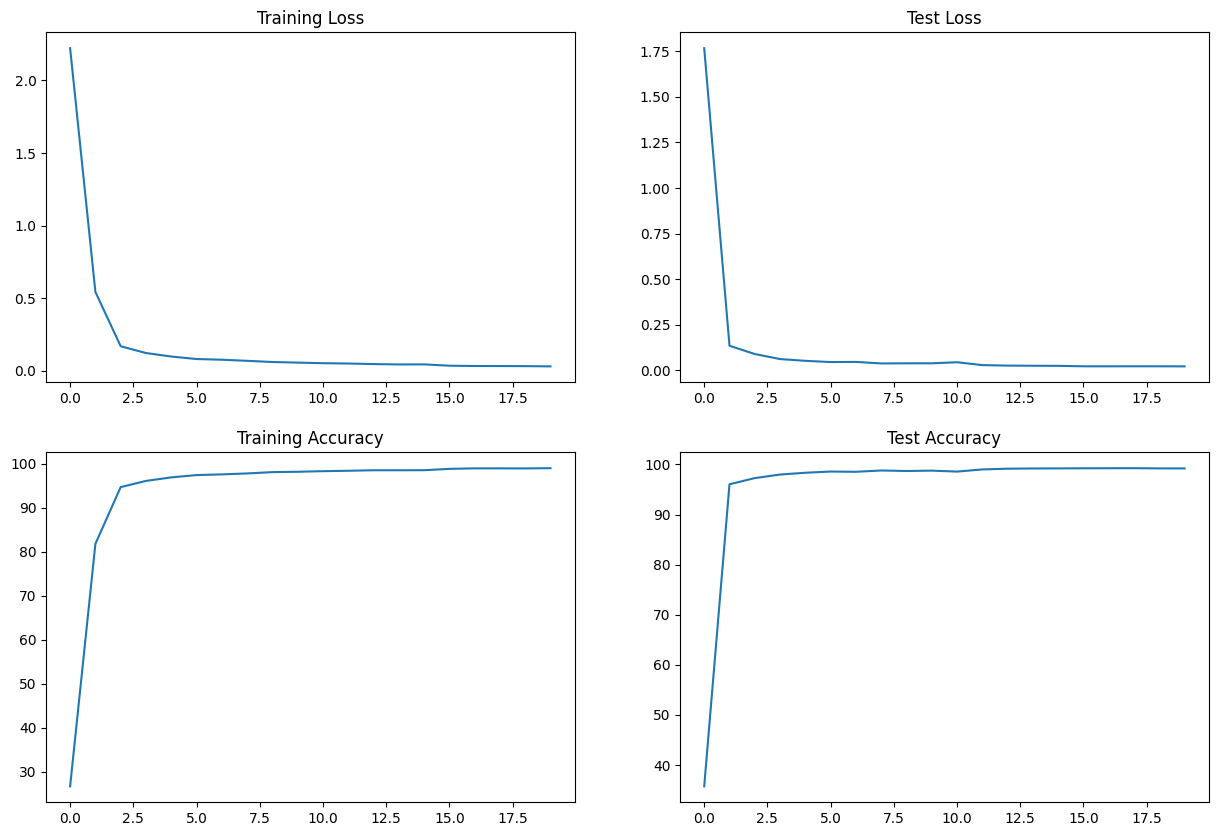

In [14]:
utils.printModelTrainTestAccuracy(train_acc, train_losses, test_acc, test_losses)